<h1><b>Data Collection

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

print(df.head())

   Account ID  Customer Name Billing Date      Amount   Status   Description  \
0        1001   David Wilson   2023-01-01  193.987558  Pending  Consultation   
1        1002  Alice Johnson   2023-01-02  370.656021  Pending      Purchase   
2        1003  Sophia Garcia   2023-01-03  233.019486  Pending      Lab Test   
3        1004   Olivia Davis   2023-01-04  296.120725     Paid     Follow-up   
4        1005   David Wilson   2023-01-05  294.654764     Paid       Therapy   

    Department  
0   Pediatrics  
1  Orthopedics  
2     Pharmacy  
3     Pharmacy  
4          ENT  


<b><h1>Ensure Data Cleanliness and Validation</b></h1>


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Account ID     110 non-null    int64  
 1   Customer Name  110 non-null    object 
 2   Billing Date   110 non-null    object 
 3   Amount         110 non-null    float64
 4   Status         110 non-null    object 
 5   Description    110 non-null    object 
 6   Department     110 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.1+ KB
None


In [ ]:
print(df.describe())

        Account ID       Amount
count   110.000000   110.000000
mean   1048.000000   479.309018
std      28.809721   738.759966
min    1001.000000    50.581003
25%    1023.250000   145.411712
50%    1045.500000   253.709053
75%    1072.750000   392.219435
max    1100.000000  3849.771331


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
print("-------------------------------------------------------------------------------------------------------------------------------")
# Check for duplicate entries
duplicates = df.duplicated().sum()
print("Duplicate Entries:", duplicates)

print("-------------------------------------------------------------------------------------------------------------------------------")
# Standardize date format
df['Billing Date'] = pd.to_datetime(df['Billing Date'], errors='coerce')

# Check for non-standard statuses
standard_statuses = ['Paid', 'Pending', 'Unpaid']
non_standard_statuses = df[~df['Status'].isin(standard_statuses)]
print("Non-standard Statuses:\n", non_standard_statuses)

print("-------------------------------------------------------------------------------------------------------------------------------")


Missing Values:
 Account ID       0
Customer Name    0
Billing Date     0
Amount           0
Status           0
Description      0
Department       0
dtype: int64
-------------------------------------------------------------------------------------------------------------------------------
Duplicate Entries: 0
-------------------------------------------------------------------------------------------------------------------------------
Non-standard Statuses:
     Account ID  Customer Name Billing Date      Amount   Status   Description  \
11        1012  Liam Martinez   2023-01-12  236.157919  Unknown       Therapy   
36        1037     Jane Smith   2023-02-06  240.093602  Unknown       Therapy   
56        1057   David Wilson   2023-02-26  327.690984  Unknown      Purchase   
71        1072   Olivia Davis   2023-03-13   73.973687  Unknown  Consultation   
99        1100  Liam Martinez   2023-04-10  118.669234  Unknown     Emergency   

     Department  
11   Cardiology  
36  Dermatolo

In [ ]:
# Print cleaned data info
print(df.info())
print("-------------------------------------------------------------------------------------------------------------------------------")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Account ID     110 non-null    int64         
 1   Customer Name  110 non-null    object        
 2   Billing Date   110 non-null    datetime64[ns]
 3   Amount         110 non-null    float64       
 4   Status         110 non-null    object        
 5   Description    110 non-null    object        
 6   Department     110 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 6.1+ KB
None
-------------------------------------------------------------------------------------------------------------------------------
   Account ID  Customer Name Billing Date      Amount   Status   Description  \
0        1001   David Wilson   2023-01-01  193.987558  Pending  Consultation   
1        1002  Alice Johnson   2023-01-02  370.656021  Pending 

In [ ]:
def calculate_billing_cycle_times(df):
    df['Billing Cycle Time'] = df['Billing Date'].diff().dt.days
    return df

def identify_discrepancies(df):
    df['Discrepancy'] = df['Amount'].diff()
    return df

def calculate_average_payment(df):
    return df['Amount'].mean()

def find_late_payments(df):
    late_payments = df[df['Status'] == 'Pending']
    return late_payments

<b><h1>Billing Analysis

In [ ]:
# Handle non-standard statuses by replacing 'Unknown' with 'Pending' or another appropriate status
df['Status'] = df['Status'].replace('Unknown', 'Pending')

# Calculate billing cycle times
df = calculate_billing_cycle_times(df)

# Identify payment discrepancies
df = identify_discrepancies(df)

# Calculate average payment amounts
average_payment = calculate_average_payment(df)

# Identify late payments
late_payments = find_late_payments(df)

# Display analysis results
print("Billing Cycle Times:\n", df['Billing Cycle Time'])

print("-------------------------------------------------------------------------------------------------------------------------------")
print("Payment Discrepancies:\n", df['Discrepancy'])

print("-------------------------------------------------------------------------------------------------------------------------------")
print("Average Payment Amount: $", average_payment)

print("-------------------------------------------------------------------------------------------------------------------------------")
print("Late Payments:\n", late_payments)

Billing Cycle Times:
 0      NaN
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
105    6.0
106    1.0
107    1.0
108    1.0
109    1.0
Name: Billing Cycle Time, Length: 110, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Payment Discrepancies:
 0              NaN
1       176.668462
2      -137.636534
3        63.101239
4        -1.465961
          ...     
105      87.295790
106     -94.128695
107    1423.193871
108   -1438.919369
109     303.002953
Name: Discrepancy, Length: 110, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Average Payment Amount: $ 479.3090181019999
-------------------------------------------------------------------------------------------------------------------------------
Late Payments:
      Account ID    Customer Name Billing Date       Amount   Status  \
0       

<h1><b>Visualization</b></h1>

C:\Users\Kala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


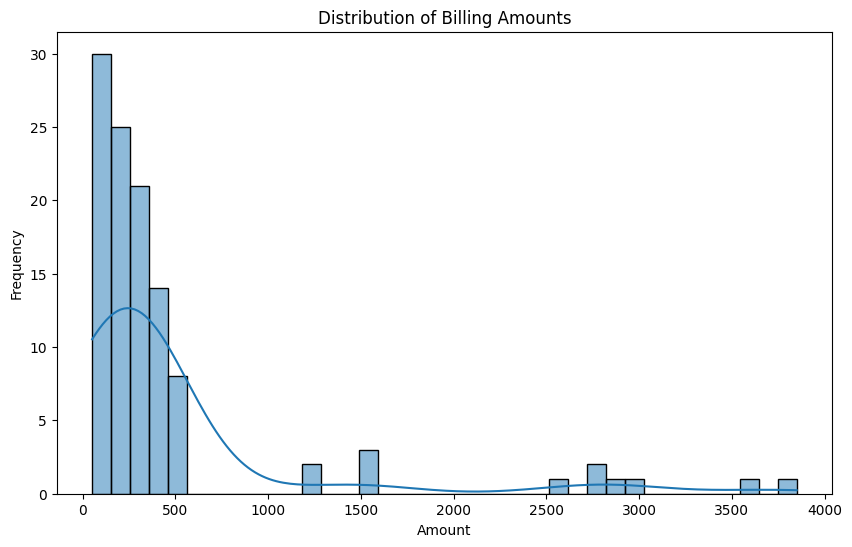

C:\Users\Kala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


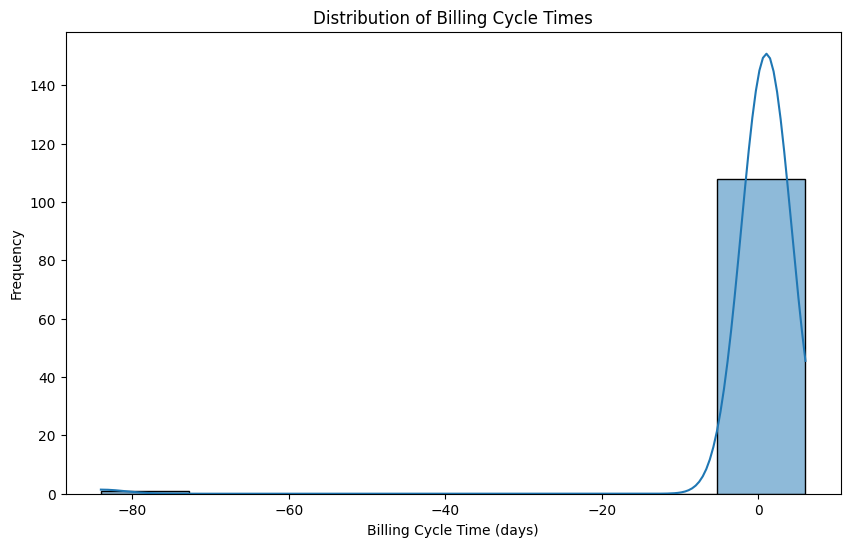

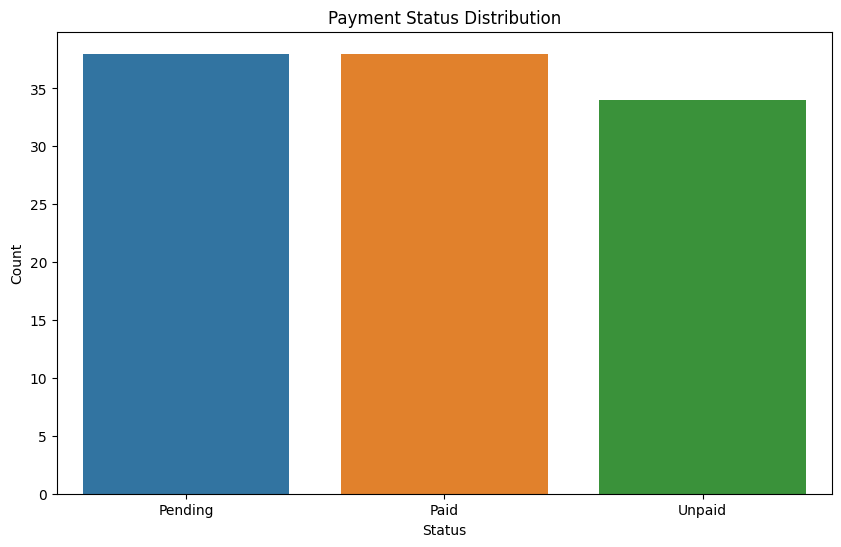

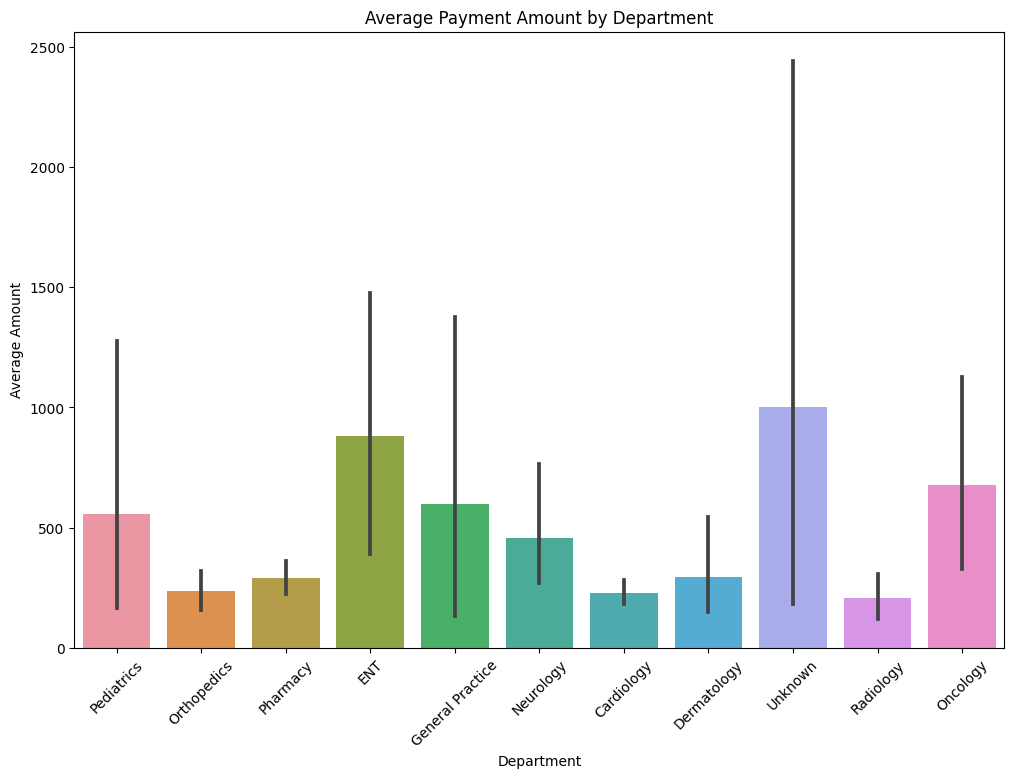

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Billing Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], kde=True)
plt.title('Distribution of Billing Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Billing Cycle Times
plt.figure(figsize=(10, 6))
sns.histplot(df['Billing Cycle Time'].dropna(), kde=True)
plt.title('Distribution of Billing Cycle Times')
plt.xlabel('Billing Cycle Time (days)')
plt.ylabel('Frequency')
plt.show()

# Payment Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Status')
plt.title('Payment Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Average Payment Amount by Department
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Department', y='Amount')
plt.title('Average Payment Amount by Department')
plt.xlabel('Department')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import datetime

# Summarize findings
report = f"""
Billing Analysis Report - {datetime.datetime.now().strftime('%Y-%m-%d')}

1. Total Entries: {len(df)}
2. Missing Values: {missing_values.sum()}
3. Duplicate Entries: {duplicates}
4. Average Payment Amount: ${average_payment:.2f}
5. Discrepancies Found: {df['Discrepancy'].count()}

Late Payments:
{late_payments[['Account ID', 'Customer Name', 'Billing Date', 'Amount', 'Status', 'Description', 'Department']].to_string(index=False)}

Detailed insights and visualizations are provided in the attached plots.
"""

print(report)

# Save the report to a text file
with open('billing_analysis_report.txt', 'w') as file:
    file.write(report)



Billing Analysis Report - 2024-07-11

1. Total Entries: 110
2. Missing Values: 0
3. Duplicate Entries: 0
4. Average Payment Amount: $479.31
5. Discrepancies Found: 109

Late Payments:
 Account ID   Customer Name Billing Date      Amount  Status   Description       Department
       1001    David Wilson   2023-01-01  193.987558 Pending  Consultation       Pediatrics
       1002   Alice Johnson   2023-01-02  370.656021 Pending      Purchase      Orthopedics
       1003   Sophia Garcia   2023-01-03  233.019486 Pending      Lab Test         Pharmacy
       1007       Chris Lee   2023-01-07 2864.738488 Pending      Lab Test General Practice
       1008   Sophia Garcia   2023-01-08  244.228596 Pending       Therapy        Neurology
       1009   Sophia Garcia   2023-01-09  183.370132 Pending     Emergency       Cardiology
       1011       Chris Lee   2023-01-11  167.993019 Pending  Consultation          Unknown
       1012   Liam Martinez   2023-01-12  236.157919 Pending       Therapy     

<h1><b>Report Generation</b></h1>

%pip install --upgrade --quiet  langchain langchain-community langchain-experimental

In [ ]:
import pandas as pd
import sqlite3

#  Connect to SQLite database (will create it if it doesn't exist)
conn = sqlite3.connect('billing_data.db')

#  Insert data into SQLite database
df.to_sql('billing', conn, if_exists='replace', index=False)

#  Close connection
conn.close()

print("CSV file successfully converted to SQLite database.")


CSV file successfully converted to SQLite database.


In [ ]:
from langchain_community.utilities.sql_database import SQLDatabase

db = SQLDatabase.from_uri("sqlite:///billing_data.db")

In [ ]:
# Set your OpenAI API key
import os
os.environ["OPENAI_API_KEY"] = ' '

In [9]:
# Define the prompt for the LLM
prompt = f"""
Generate a detailed report based on the billing analysis:

1. Distribution of Billing Amounts:
Explain the distribution of billing amounts based on the provided histogram. Most transactions fall within a certain range, with a few high-cost transactions significantly above the average, suggesting a mix of routine and high-cost services or procedures.

2. Billing Cycle Times:
Describe the pattern of billing cycle times based on the provided histogram. Shorter cycles are more common, indicating regular billing intervals. Outliers with longer cycles might need further investigation.

3. Payment Status Distribution:
Summarize the distribution of payment statuses based on the provided bar plot. A significant number of transactions are still pending, suggesting issues with payment processing or follow-ups.

4. Average Payment Amount by Department:
Discuss the average payment amounts across different departments based on the provided bar plot. Some departments, such as Oncology and ENT, have higher average billing amounts, which could be due to the nature of the treatments and procedures they provide.


# Handle non-standard statuses by replacing 'Unknown' with 'Pending' or another appropriate status
df['Status'] = df['Status'].replace('Unknown', 'Pending')

# Calculate billing cycle times
df = calculate_billing_cycle_times(df)

# Identify payment discrepancies
df = identify_discrepancies(df)

# Calculate average payment amounts
average_payment = calculate_average_payment(df)

# Identify late payments
late_payments = find_late_payments(df)

# Display analysis results
print("Billing Cycle Times:\n", df['Billing Cycle Time'])

print("-------------------------------------------------------------------------------------------------------------------------------")
print("Payment Discrepancies:\n", df['Discrepancy'])

Billing Cycle Times:
 0      NaN
1      1.0
2      1.0
3      1.0
4      1.0
      ...
105    6.0
106    1.0
107    1.0
108    1.0
109    1.0
Name: Billing Cycle Time, Length: 110, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Payment Discrepancies:
 0              NaN
1       176.668462
2      -137.636534
3        63.101239
4        -1.465961
          ...
105      87.295790
106     -94.128695
107    1423.193871
108   -1438.919369
109     303.002953
Name: Discrepancy, Length: 110, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
Average Payment Amount: $ 479.3090181019999
-----------------------------------------------


Billing Analysis Report - 2024-07-11

1. Total Entries: 110
2. Missing Values: 0
3. Duplicate Entries: 0
4. Average Payment Amount: $479.31
5. Discrepancies Found: 109

Late Payments:
 Account ID   Customer Name Billing Date      Amount  Status   Description       Department
       1001    David Wilson   2023-01-01  193.987558 Pending  Consultation       Pediatrics
       1002   Alice Johnson   2023-01-02  370.656021 Pending      Purchase      Orthopedics
       1003   Sophia Garcia   2023-01-03  233.019486 Pending      Lab Test         Pharmacy
       1007       Chris Lee   2023-01-07 2864.738488 Pending      Lab Test General Practice
       1008   Sophia Garcia   2023-01-08  244.228596 Pending       Therapy        Neurology
       1009   Sophia Garcia   2023-01-09  183.370132 Pending     Emergency       Cardiology
       1011       Chris Lee   2023-01-11  167.993019 Pending  Consultation          Unknown
       1012   Liam Martinez   2023-01-12  236.157919 Pending       Therapy       Cardiology
       1017        John Doe   2023-01-17 2748.478753 Pending        Refund              ENT
       1023      Emma Brown   2023-01-23  390.528485 Pending     Emergency        Radiology
       1024   Liam Martinez   2023-01-24  288.326148 Pending       Therapy      Dermatology
       1028 Mason Rodriguez   2023-01-28 1274.901263 Pending    Medication         Oncology
       1030      Emma Brown   2023-01-30  256.946223 Pending     Emergency       Cardiology
       1032    David Wilson   2023-02-01 2812.330089 Pending     Procedure         Oncology
       1034   Liam Martinez   2023-02-03 1573.703437 Pending   Service Fee        Neurology
       1037      Jane Smith   2023-02-06  240.093602 Pending       Therapy      Dermatology
       1041   Liam Martinez   2023-02-10  123.705650 Pending     Follow-up              ENT
       1044        John Doe   2023-02-13  488.811544 Pending Miscellaneous          Unknown
       1046      Jane Smith   2023-02-15  164.855552 Pending        Refund         Pharmacy
       1048      Jane Smith   2023-02-17  407.045279 Pending      Lab Test       Cardiology
       1049        John Doe   2023-02-18  187.162737 Pending      Purchase         Pharmacy
       1053       Chris Lee   2023-02-22  445.409660 Pending        Refund         Oncology
       1054 Mason Rodriguez   2023-02-23  296.284692 Pending     Follow-up        Neurology
       1056       Chris Lee   2023-02-25  204.590527 Pending   Service Fee       Cardiology
       1057    David Wilson   2023-02-26  327.690984 Pending      Purchase        Neurology
       1063      Emma Brown   2023-03-04  250.471883 Pending Miscellaneous        Neurology
       1071    David Wilson   2023-03-12  174.497048 Pending       Therapy       Cardiology
       1072    Olivia Davis   2023-03-13   73.973687 Pending  Consultation         Oncology
       1073        John Doe   2023-03-14  293.529776 Pending        Refund         Oncology
       1080 Mason Rodriguez   2023-03-21  284.483114 Pending   Service Fee              ENT
       1087      Emma Brown   2023-03-28 3849.771331 Pending    Medication          Unknown
       1093      Jane Smith   2023-04-03  474.625286 Pending     Procedure         Pharmacy
       1094      Jane Smith   2023-04-04 3593.752963 Pending      Purchase       Pediatrics
       1099      Emma Brown   2023-04-09  333.925646 Pending        Refund         Oncology
       1100   Liam Martinez   2023-04-10  118.669234 Pending     Emergency              ENT
       1017        John Doe   2023-01-17 2526.258343 Pending        Refund              ENT
       1028 Mason Rodriguez   2023-01-28 1511.137290 Pending    Medication         Oncology
       1030      Emma Brown   2023-01-30  375.220875 Pending     Emergency       Cardiology

"""

In [ ]:

from langchain_community.agent_toolkits import create_sql_agent
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
agent_executor = create_sql_agent(llm, db=db, agent_type="openai-tools", verbose=True)

<b><h1>Can ask questions/queries/report to the database</h1></b>

In [ ]:
agent_executor.invoke(
    "List all customer name?"
)



> Entering new SQL Agent Executor chain...

Invoking: `sql_db_list_tables` with `{}`


billing
Invoking: `sql_db_schema` with `{'table_names': 'billing'}`



CREATE TABLE billing (
	"Account ID" INTEGER, 
	"Customer Name" TEXT, 
	"Billing Date" TIMESTAMP, 
	"Amount" REAL, 
	"Status" TEXT, 
	"Description" TEXT, 
	"Department" TEXT, 
	"Billing Cycle Time" REAL, 
	"Discrepancy" REAL
)

/*
3 rows from billing table:
Account ID	Customer Name	Billing Date	Amount	Status	Description	Department	Billing Cycle Time	Discrepancy
1001	David Wilson	2023-01-01 00:00:00	193.9875582	Pending	Consultation	Pediatrics	None	None
1002	Alice Johnson	2023-01-02 00:00:00	370.6560205	Pending	Purchase	Orthopedics	1.0	176.66846230000002
1003	Sophia Garcia	2023-01-03 00:00:00	233.0194861	Pending	Lab Test	Pharmacy	1.0	-137.63653440000002
*/
Invoking: `sql_db_query` with `{'query': 'SELECT "Customer Name" FROM billing'}`


[('David Wilson',), ('Alice Johnson',), ('Sophia Garcia',), ('Olivia Davis',), ('David Wilson'

{'input': 'List all customer name?',
 'output': 'The customer names in the database are:\n1. David Wilson\n2. Alice Johnson\n3. Sophia Garcia\n4. Olivia Davis\n5. Chris Lee\n6. Liam Martinez\n7. Jane Smith\n8. Emma Brown\n9. John Doe\n10. Mason Rodriguez\n\nThese are the first 10 customer names from the database.'}

<h1><b>Report 

In [10]:
# Call the OpenAI API to generate the report
response = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
      {"role": "system", "content": "You are a helpful assistant."},
      {"role": "user", "content": prompt}
  ],
  max_tokens=500,
  temperature=0.7
)

# Extract the generated report text
report = response['choices'][0]['message']['content'].strip()

# Print the generated report
print(report)

## Billing Analysis Report - 2024-07-11

### Overview:
- Total Entries: 110
- Missing Values: 0
- Duplicate Entries: 0
- Average Payment Amount: $479.31
- Discrepancies Found: 109

---

### 1. Distribution of Billing Amounts:
The histogram analysis indicates that most transactions fall within a certain range, with a few high-cost transactions significantly above the average. This suggests a mix of routine and high-cost services or procedures being billed.

### 2. Billing Cycle Times:
Based on the histogram, shorter billing cycles are more common, indicating regular billing intervals. Outliers with longer cycle times may require further investigation to understand the reasons behind the delays.

### 3. Payment Status Distribution:
The bar plot shows a significant number of transactions with pending payment statuses. This suggests potential issues with payment processing or follow-ups that need to be addressed to ensure timely payments.

### 4. Average Payment Amount by Department:
Depar